# Estadística Inferencial - Intervalos de confianza

<a id="toc"></a>
## Contenido

- [Instrucciones Generales](#Instruciones-Generales)
- [Inferencia Estadística](#infstat)
  - [Función generatriz de momentos](#fgm)
  - [Ley de los grandes números](#lln)
  - [Teorema del límite central](#clt)
- [Estimación puntual](#pointest)
  - [Media vs. mediana como estimadores de la media poblacional](#meanmed)
  - [Estimador sesgado y no sesgado de la varianza](#var)
- [Estimación por intervalos](#intest)
  - [Intervalo de Confianza para la media cuando se muestrea una distribución normal con varianza conocida](#zint)
  - [Intervalo de Confianza para la media cuando se muestrea una distribución normal con varianza desconocida](#tint)
  - [Intervalo de Confianza para la diferencia de medias cuando se muestrean dos distribuciones normales independientes con varianzas desconocidas pero iguales](#tdint)
  - [Intervalo t de Welch (Welch's t-Interval)](#welch)
  - [Intervalo para datos pareado (Paired t-Interval)](#paired)
  - [Intervalo de confianza para la varianza de una población](#varpop)
  - [Intervalo de Confianza con respecto al cociente de varianzas de dos distribuciones normales independientes](#varcoc)
  - [Intervalo de Confianza para la proporción (una sola muestra) para muestras grandes](#prop)
  - [Intervalo de Confianza para la diferencia de proporciones cuando se muestrean dos poblaciones independientes](#propdiff)
  - [Resumen de fórmulas](#fic)

## Instruciones Generales

### Código

- Cuando aparezca esta imagen en el notebook, encontrará código Python que puede ser intermedio o avanzado. 

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/>

### Opcional: Practique Python

<br/><br/>

  - **Esta sección es opcional**.
  - Concéntrense en los conceptos que se están tratando. 
  - Cuando se sienta cómodo con Python estudie el código. 

### Experimentación

- Cuando aparezca esta imagen en el notebook, encontrará instrucciones de actividades de experimentación a realizar de forma autónoma para reforzar los temas tratados. 
  - Esto puede ser cambiar un fragmento del código. 
  - O realizar análisis adicionales sobre los resultados presentados. 

<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>
<br/>

<a id="infstat"></a>
### Inferencia Estadística

[Volver al índice](#toc)

- Vamos a presentar algunos conceptos que nos serán útiles para entender la inferencia estadística.

- Hemos presentado conceptos de distribución de una variable aleatoria (v.a.) tanto para el caso discreto como continuo. 
  - En nuestros ejemplos siempre hemos conocido los parámetros poblacionales de nuestra distribución.

- Cuando observamos un sistema, tenemos acceso a una muestra finita (subconjunto), $x_1, x_2, \dots, x_n$ de la población, que sigue cierta distribución, ej. $X\sim N(\mu, \sigma)$. 
  - En la mayoría de los casos, desconocemos la distribución de la población y desconocemos sus parámetros $\mu, \sigma$.

- **La estadística inferencial** se encarga de inferir información acerca de los parámetros poblacionales, ej. $\mu, \sigma$, a partir de la muestra observada. 

- Por ejemplo la media muestral $\bar{X} = \frac{1}{n} \sum_{i=1}^n x_i$ es un **estimador puntual** de la media poblacional $\mu$ y la varianza muestral $s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{X})^2$ es un estimador no sesgado de la varianza poblacional.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/sample.png" alt="" width="600" />

- Presentaremos conceptos como función generatriz de momentos, que nos serán útiles para demostrar el teorema del límite central. 

- El teorema del límite central nos dice qué distribución tiene la v.a. $\bar{X}$. 
  - Conocer la distribución de $\bar{X}$ nos ayudará a inferir información acerca del parámetro poblacional $\mu$. 

- Algunos conceptos que debemos tener en cuenta para esta sección:
  - **Población:** es el conjunto de elementos que son objeto de estudio estadístico.
  - **Individuo:** cada uno de los elementos de la población. 
    - El número total de individuos de la población se suele denotar como $N$.
  - **Muestra:** es una parte (subconjunto) de la población con la que realmente se realiza el estudio.
  - **Tamaño de muestra:** es el número de elementos del que se compone la muestra y se suele denotar como **n**.
  - **Estadístico:** cualquier función de la muestra. Por ejemplo, la media o la varianza muestrales son estadísticos. 
  - **Estimadores:** son estadísticos independientes de los parámetros de la población, y que se utilizan para aproximarlos.

<a id="fgm"></a>
## Función generatriz de momentos (FGM)

[Volver al índice](#toc)

$$
M_X(t) = E[e^{tX}]= \left\{
                \begin{array}{ll}
                  \sum_{R(X)} g_X(x)  e^{tx},\ X \text{: va. discreta,} \\
                  \int_{R(X)} [f_X(x)  e^{tx}] dx,\ X \text{: v.a. continua.}
                \end{array}
              \right.
$$

Usando el FGM, podemos obtener los momentos de la variable aleatoria $X$, $E[X^n]$, derivando la función $n$ veces y evaluando $t=0$.

$$
E[X] = M_x'(t=0)
$$

$$
E[X^2] = M_x''(t=0)
$$

$$
E[X^n] = M_x^n(t=0)
$$

Por lo tanto, podemos usar el FGM para calcular el valor esperado y la varianza de $X$.

### La FGM determina la distribución

La FGM de una variable aleatoria determina su distribución: si dos v.a.s. tienen la misma FGM, deben tener
la misma distribución.

### Suma de variables aleatorias independientes

Si $X$ y $Y$ son independientes,
entonces la FGM de $X + Y$ es el producto de las FGM individuales:

$$
M_X+Y(t) = M_X(t)M_Y(t).
$$

Esto es cierto porque si $X$ y $Y$ son independientes, entonces $E[e^{t(X+Y)}] = E[e^{tX}]E[e^{tY}]$.

Podemos extender esto a $n$ variables:

$$W = X_1 + X_n + \cdots + X_n,$$ 

entonces,

$$
M_W(t) = E[e^{tW}] = E[e^{t(X_1+X_2+\cdots + X_n)}] = E[e^{tX_1}]E[e^{tX_2}] \cdots E[e^{tX_n}]
$$

$$
M_W(t) = M_{X_1}(t) M_{X_2}(t) \dots M_{X_n}(t) 
$$

### Suma de variables aleatorias normales independientes

Si tenemos una colección de v.a.s. normales independientes. $X_1 + X_2 + \cdots + X_n$, con $X_i \sim N(\mu_i, \sigma_i^2)$. Entonces la distribución de $W = X_1 + X_n + \cdots + X_n$, es


$$
W \sim \mathcal{N} \left(\sum \mu_i, \sum \sigma_i^2 \right).
$$


**Demostración**

La función generadora de momentos de una variable aleatoria $X \sim N(\mu, \sigma^2)$ es $M_X(t) = e^{t \mu + 1/2 \sigma^2 t^2}$.

$$
M_W(t) = M_{X_1}(t) M_{X_2}(t) \dots M_{X_n}(t) 
$$

$$
M_W(t) = [e^{t \mu_1 + 1/2 \sigma_1^2 t^2}] [e^{t \mu_2 + 1/2 \sigma_2^2 t^2}] \cdots [e^{t \mu_n + 1/2 \sigma_n^2 t^2}]
$$ 

$$
M_W(t) = e^{t(\mu_1 + \mu_2 + \cdots + \mu_n) + 1/2 t^2 (\sigma_1^2 + \sigma_2^2 + \cdots + \sigma_n^2) }
$$

La última expresión corresponde a la FGM de una distribución normal, y dado que la FGM determina la distribución, tenemos que
$$W \sim N (\mu_1 + \mu_2 + \cdots + \mu_n, \sigma_1^2 + \sigma_2^2 + \cdots + \sigma_n^2).$$

En general si $W = \sum a_i X_i$, tenemos:

$$
W \sim \mathcal{N} \left(\sum a_i \mu_i, \sum a_i^2 \sigma_i^2 \right).
$$

<a id="lln"></a>
### Ley de los grandes números

- En la teoría de la probabilidad, la ley de los grandes números (LGN) es un teorema que describe el resultado de realizar el mismo experimento un gran número de veces (obtener una muestra muy grande). 

- De acuerdo con la ley, el promedio de los resultados obtenidos de una gran cantidad de ensayos debe estar cerca del valor esperado y tiende a acercarse al valor esperado a medida que se realizan más ensayos.

- Supongamos que tenemos una v.a. i.i.d. $X_1 , X_2 , X_3 , \dots$
con media finita $\mu$ y varianza finita $\sigma^2$.
Para todos los enteros positivos $n$, sea
$$
\bar{X}_n=\frac{X_1 + \cdots + X_n}{n}
$$
sea la media muestral de $X_1$ a $X_n$.
La media muestral es en sí misma una v.a., con media
$\mu$ y varianza $\sigma^2/n$:
$$
E(\bar{X}_n)=\frac{1}{n}E(X_1+\cdots+X_n)=
\frac{1}{n}(E(X_1)+\cdots+E(X_n))=\mu,
$$
$$
Var(\bar{X}_n)=\frac{1}{n^2}Var(X_1+\cdots+X_n)=
\frac{1}{n^2}(Var(X_1)+\cdots+Var(X_n))=\frac{\sigma^2}{n}.
$$

- La ley de los grandes números dice que a medida que el tamaño de la muestra $n$ crece, la media muestral $\bar{X}_n$ converge a la verdadera media $\mu$.

- Pero, ¿cuál es la distribución de $\bar{X}_n$ a lo largo del camino para convertirse en un constante?

<a id="clt"></a>
### Teorema del límite central

- En la teoría de la probabilidad, el teorema del límite central (TLC) establece que, en muchas situaciones, cuando se suman variables aleatorias independientes, su suma tiende hacia una distribución normal incluso si las variables originales en sí no están distribuidas de forma normal. 

- El TLC es un concepto clave en la teoría de la probabilidad porque implica que los métodos probabilísticos y estadísticos que funcionan para distribuciones normales pueden aplicarse a muchos problemas que involucran otros tipos de distribuciones.

Si tenemos una colección de v.a.s. normales i.i.d. $X_1 + X_2 + \cdots + X_n$, con $X_i \sim N(\mu, \sigma^2)$.

Entonces para $n$ lo suficientemente grande tenemos:

$$
\sum X_i \sim N(n \mu, n \sigma^2) \Rightarrow \frac{\sum X_i - n \mu}{\sigma \sqrt{n}} \sim N(0,1)
$$

$$
\bar{X} = \frac{\sum X_i}{n}  \sim N(\mu, \sigma^2 / n) \Rightarrow \frac{\bar{X} - \mu}{ \sigma / \sqrt{n}} \sim N(0,1)
$$

- Demostración

$$
E[\bar{X}] = E \left[\frac{\sum X_i}{n} \right] = \frac{1}{n} E \left[\sum X_i \right]
= \frac{1}{n} E \left[X_1 + X_2 + \cdots + X_n \right] = \frac{n \mu}{n} = \mu.
$$

$$
Var[\bar{X}] = Var \left[\frac{\sum X_i}{n} \right] = \frac{1}{n^2} var \left[\sum X_i \right]
= \frac{1}{n^2} E \left[X_1 + X_2 + \cdots + X_n \right] = \frac{n \sigma^2}{n^2} = \frac{\sigma^2}{n}.
$$

- En este punto conocemos ya la distribución que tiene la media muestral $\bar{X}$.
  - Esto nos será útil para inferir información acerca de la media poblacional $\mu$ usando el estimador $\bar{X}$.
- La distribución normal es una distribución importante por su relación con el teorema del límite central. 

- **Vea una demostración interactiva:**
  - Ley de los grandes números: https://en-interactive.herokuapp.com/#/5/1
  - Teorema del Límite Central: https://en-interactive.herokuapp.com/#/6/1

<a id="pointest"></a>
### Estimación puntual

[Volver al índice](#toc)

- Vamos a discutir estimación puntual y algunas de las características deseables para un estimador. 

- De nuevo vamos a partir de la definición de la media muestral $\bar{X} = \frac{1}{n} \sum_{i=1}^n x_i$ es un **estimador puntual** de la media poblacional $\mu$.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/sample.png" alt="" width="600" />


- **Definición:**

  - Sea $X$ una variable aleatoria (población) cuya distribución $f_X(x)$ depende de un parámetro $\theta$
desconocido. 
- Un estimador del parámetro $\theta$ es un **estadístico** $\hat{\theta} = T(X_1, X_2, \dots, X_n)$ que se utiliza para estimar el valor de dicho parámetro, con base en los valores observados de la muestra aleatoria.

### Criterios para la selección de un estimador:
1. Que sea centrado (no sesgado), es decir, que $E[\hat{\theta}] = \theta$.
2. De mínima varianza, en el sentido que si $\hat{\theta_1}$ y $\hat{\theta_2}$ son estimadores centrados de $\theta$, se considera mejor aquel de menor varianza.
3. Es deseable que sea lineal respecto a las variables de la muestra.

### Ejemplo

- Sea $X_1, X_2, \dots X_n$ una muestra aleatoria de una v.a. $X$, con media $\mu$ y 
varianza $\sigma^2$ (parámetros desconocidos).
- Entonces:
$$\hat{\mu} = \bar{X} = \frac{1}{n} \sum_{i=1}^n x_i$$
y 
$$\hat{\sigma^2} = s^2= \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{X})^2$$
son estimadores puntuales de la media $\mu$ y la
varianza $\sigma^2$ poblacionales, respectivamente.

<a id="meanmed"></a>
- **Estimadores de la media poblacional: media muestral $\bar{X}$ vs. mediana de la muestra.**

  1. Vamos a generar una muestra aleatoria a partir de una distribución uniforme estándar:
  $$X\sim U(a, b), a=0, b=1.$$
    - La muestra tiene tamaño n=30. 
  2. A partir de la muestra vamos a calcular la media muestral $\bar{X}$. 
  3. Repetimos 1 y 2 un número dado de veces **size = 100000**.
  4. Construiremos un gráfico de densidad con las **size = 100000** observaciones (cálculos) que hicimos de la media muestral $\bar{X}$. 
    - Note que $\bar{X}$ es una v.a. 

- Repetimos el proceso anterior, pero en lugar de calcular el gráfico de densidad para la media muestral $\bar{X}$, lo haremos para la mediana de la muestra. 

- Conocemos la distribución de origen $X\sim U(a, b), a=0, b=1$, podemos calcular por tanto la media poblacional y usar como referencia, para observar si las curvas están centradas alrededor de $\mu$:
$$\mu = \frac{1}{2} (a+b)$$

  - Vea: https://en.wikipedia.org/wiki/Continuous_uniform_distribution

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/>

### Opcional: Practique Python


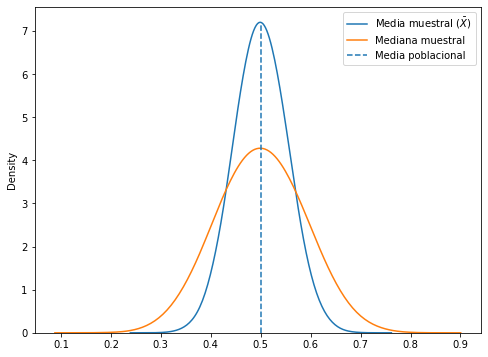

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform

# fijamos una semilla para tener reproducibilidad de los resultados
np.random.seed(123)

size = 100000  # repeticiones de la simulación
n = 30  # tamaño de muestra

# parámetros de la distribución uniforme
a = 0
b = 1

U = uniform.rvs(a, b-a, size=(size,n))  # v.a. uniforme X \sim U(0,1)
# Vea la media y varianza: https://en.wikipedia.org/wiki/Continuous_uniform_distribution
mu = 1/2 * (a + b)

Umean = U.mean(axis=1)
Umedian = np.median(U, axis=1)

plt.figure(figsize=(8,6))
sns.kdeplot(Umean, label=r"Media muestral ($\bar{X}$)", bw_adjust=3)
sns.kdeplot(Umedian, label="Mediana muestral", bw_adjust=3)
plt.vlines(mu, 0, 7.2, linestyles="dashed", label="Media poblacional")
l = plt.legend()

- Podemos observar en la figura arriba que la distribución de la media (curva azul), así como de la mediana (curva naranaja) de la muestra están centradas alrededor de la media poblacional $\mu = \frac{1}{2} (a+b)$ representada por la línea punteada.
  - Sin embargo la media muestral $\bar{X}$, es el estimador de mínima varianza. 
  
- Podemos apreciar que $E[\bar{X}] \approx \mu$, tal como esperamos para un estimador que sea centrado (no sesgado), decir, que $E[\hat{\theta}] = \theta$.

[Volver al índice](#toc)

<a id="var"></a>
- **Observemos dos estimadores para la varianza poblacional:**

  - Estimador de máxima verosimilitud: $$\hat{\sigma^2} = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{X})^2.$$
  - Estimador no sesgado: $$\hat{\sigma^2} = s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{X})^2.$$
  
- Vamos a repetir el proceso que implementamos para la media y la mediana, esta vez para los 2 estimadores definidos arriba.  

- Conocemos la distribución de origen $X\sim U(a, b), a=0, b=1$, podemos calcular por tanto la varianza de la población y usarla como referencia, para observar si las curvas están centradas alrededor de $\mu$:
$$\sigma^2 = \frac{1}{12} (b-a)^2.$$
  - Vea: https://en.wikipedia.org/wiki/Continuous_uniform_distribution

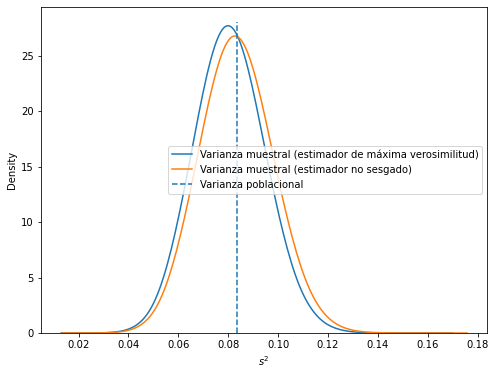

In [2]:
size = 100000  # repeticiones de la simulación
n = 30  # tamaño de muestra

# parámetros de la distribución uniforme
a = 0
b = 1

mu = 1/2 * (a + b)

sigma2 = 1/12 * (b - a)**2

U = uniform.rvs(a, b-a, size=(size,n))  # v.a. uniforme X \sim U(0,1)

Uvar_mv = np.var(U, axis=1)  # estimador de máxima verosimilitud
Uvar_ns = np.var(U, axis=1, ddof=1)  # estimador centrado

plt.figure(figsize=(8,6))
sns.kdeplot(Uvar_mv, label=r"Varianza muestral (estimador de máxima verosimilitud)", bw_adjust=3)
sns.kdeplot(Uvar_ns, label="Varianza muestral (estimador no sesgado)", bw_adjust=3)
plt.vlines(sigma2, 0, 28, linestyles="dashed", label="Varianza poblacional")
plt.xlabel(r"$s^2$")
l = plt.legend()

- Podemos observar que el estimador de máxima verosimilitud (curva azul) es sesgado con respecto a la varianza poblacional $\sigma^2 = \frac{1}{12} (b-a)^2$. 
  - Este debe corregirse para poder tener un estimador centrado (curva naranja). 
- Note que el estimador de máxima verosimilitud tiene en el denominador $n$ mientras que el estimador no sesgado divide por $n-1$, es decir el estimador de máxima verosimilitud divide por un valor más grande, por tanto subestima el valor de la varianza poblacional, y la curva azul está sesgada a la izquierda. 
    - ¿Qué ocurre para $n \rightarrow \infty$?

<a id="intest"></a>
## Estimación por intervalos

[Volver al índice](#toc)

- Más útil que dar una **estimación puntual** del parámetro poblacional, es dar una estimación por intervalo. 
  - Esto lo conocemos como un **intervalo de confianza** para el parámetro del que estamos infiriendo información. 
  
- Vamos a presentar algunos conceptos que nos serán útiles para entender algunos de los estadísticos utilizados para construir **intervalos de confianza** y **pruebas de hipótesis** acerca de los parámetros poblacionales. 

### Distribución de algunos estadísticos importantes

Si $X$ y $Y$ son dos variable aleatorias distribuidas como
$$
X \sim \mathcal{N}\left(\mu_X, \sigma_X^2\right) \textrm{ y } 
Y \sim \mathcal{N}\left(\mu_Y, \sigma_Y^2\right),
$$ 
y se seleccionan dos muestras aleatorias 
$X_1,X_2,\dots,X_n$ y $Y_1,Y_2,\dots,Y_m$, 
determine la distribución de probabilidad de 
los siguientes estadísticos:

---

$$
\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n} \sim \mathcal{N}(0,1).\quad (1)
$$

Sabemos que v.a. $\bar{X}$ (media muestral)
está distribuida como $\bar{X}\sim \mathcal{N}\left(\mu_X, \frac{\sigma_X^2}{n}\right)$.
Al normalizar para parámetros conocidos de la población,
es decir, restar la media $\mu$ y dividir por la desviación 
$\sqrt{\frac{\sigma_X^2}{n}}$, tenemos la expresión en la Ec. (1).

---

\begin{equation}
    \boldsymbol{(n-1)\frac{S_X^2}{\sigma_X^2}} \sim \chi^2_{(n-1)}.\quad (2)
\end{equation}

$$
\sum_{i=1}^n(X_i - \mu)^2  = \sum_{i=1}^n[(X_i - \bar{X}) + (\bar{X} - \mu)]^2
$$
$$
 = \sum_{i=1}^n(X_i - \bar{X})^2 + \sum_{i=1}^n(\bar{X} - \mu)^2 + 2(\bar{X} - \mu)\sum_{i=1}^n(X_i - \bar{X})
$$
$$
 = \sum_{i=1}^n(X_i - \bar{X})^2 + n(\bar{X} - \mu)^2
$$

Partimos de sumar y restar $\bar{X}$, es decir hemos suamdo cero,
por lo que ambas expresiones de la igualdad son equivalentes.
Luego descomponemos la expresión resultante como se muestra en la segunda línea.
El término $\sum_{i=1}^n(X_i - \bar{X})$ es igual a cero, 
y la sumatoria en el segundo término es una suma constante,
por lo tanto es igual a $n$ veces $(\bar{X} - \mu)^2$. 
Partimos de la expresión obtenida arriba, 
$$
\sum_{i=1}^n(X_i - \mu)^2 
 = \sum_{i=1}^n(X_i - \bar{X})^2 + n(\bar{X} - \mu)^2.
$$
dividimos 
cada término de la igualdad entre $\sigma^2$ y 
sustituimos $\sum_{i=1}^n(X_i - \bar{X})^2$ por $(n - 1)S^2$.
Esto último proviene de despejar de la definición
del estimador insesgado de la varianza
muestral $S^2 = \frac{1}{n-1}\sum_{i=1}^n(X_i - \bar{X})^2$.

El resulado es:

$$
\frac{1}{\sigma^2}\sum_{i=1}^n(X_i - \mu)^2 = 
\frac{(n - 1)S^2}{\sigma^2} + 
\frac{(\bar{X} - \mu)^2}{\sigma^2/n}.
$$

Note que el término en rojo está distribuido como
$\frac{1}{\sigma^2}\sum_{i=1}^n(X_i - \mu)^2 \sim \chi^2_{(n)}$.
El término siguiente está distribuido como 
$\frac{(\bar{X} - \mu)^2}{\sigma^2/n} \sim \chi^2_{(1)}$.
Recuerde que $Z_1^2 + Z_2^2 + \dots + Z_n^2 \sim \chi^2_{(n)}$, donde $Z\sim \mathcal{N}(0,1)$.
Sabemos que $W = \sum_{i=1}^n W_i = \chi^2_{(\sum \nu_i)}$, con $W_i \sim \chi^2_{(\nu_i)}$, 
por tanto al despejar $\frac{(n - 1)S^2}{\sigma^2}$ resulta la expresión en la Ec. (2).

---

$$    
\frac{\bar{X}-\mu_X}{S_X/\sqrt{n}} \sim t_{(n-1)}.\quad (3)
$$

Tenemos que 
$$
U=(n-1)\frac{S_X^2}{\sigma_X^2} \sim \chi^2_{(\nu=n-1)},\quad 
Z=\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n} \sim \mathcal{N}(0,1).
$$
Usando la definición de la variable aleatoria 
$$T=\frac{Z}{\sqrt{U/\nu}}\sim t_{\nu},$$
donde $\nu$ son los grados de libertad de la distribución,
comprobamos la expresión de la Ec. (3) a continuación:

$$
T=\frac{Z}{\sqrt{U/\nu}} \\
=\frac{\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n}}{\sqrt{\frac{(n-1)\frac{S_X^2}{\sigma_X^2}}{n-1}}}
=\frac{\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n}}{\sqrt{\frac{S_X^2}{\sigma_X^2}}}
=\frac{\frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n}}{\frac{S_X}{\sigma_X}}
$$

$$
=\frac{\bar{X} - \mu_X}{S_X / \sqrt n} \sim t_{(n-1)}.
$$

---

\begin{equation}
    \boldsymbol{\frac{S_Y^2 \sigma_X^2}{S_X^2 \sigma_Y^2}}
    \sim F_{(\omega=m-1, \nu=n-1)}.\quad (4)
\end{equation}

Tenemos que 
$$
U=(m-1)\frac{S_Y^2}{\sigma_Y^2} \sim \chi^2_{(\omega=m-1)},\
V=(n-1)\frac{S_X^2}{\sigma_X^2} \sim \chi^2_{(\nu=n-1)}.
$$
De la definición de la v.a. $W = \frac{U/\omega}{V/\nu} \sim F(\omega, \nu)$,
comporbamos la expresión de la Ec. (4):

$$
W = \frac{U/\omega}{V/\nu} 
$$

$$
= \frac{\frac{(m-1)\frac{S_Y^2}{\sigma_Y^2}}{m-1}}
{\frac{(n-1)\frac{S_X^2}{\sigma_X^2}}{n-1}} = 
\frac{\frac{S_Y^2}{\sigma_Y^2}}{\frac{S_X^2}{\sigma_X^2}}
= \frac{S_Y^2 \sigma_X^2}{S_X^2 \sigma_Y^2} \sim F_{(\omega=m-1, \nu=n-1)}.
$$

- Puede observar las distribuciones muestrales discutidas anteriormente, $Z$, $\chi^2$, $T$, y $F$ generadas por simulación en el siguiente notebook: https://anaconda.org/marsgr6/sampling_distributions/notebook.

<a id="zint"></a>
### Intervalo de Confianza para la media cuando se muestrea una distribución normal con varianza conocida

[Volver al índice](#toc)

- **Supuestos:**

  1. Variable aleatoria (población): $X \sim N(\mu, \sigma^2)$.
  2. Parámetros poblacionales: $\mu$ desconocida, $\sigma^2$ conocida. 
  3. Muestra aleatoria: $\bar{X}, n$, calculables a partir de la muestra aleatoria. 
  
  
- **Estadístico:**
  1. Estimador del parámetro $\mu$:
  $$
  \bar{X} \sim N(\mu, \frac{\sigma^2}{n}).
  $$
  2. Construcción del estadístico:
  $$
  \frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n} \sim N(0,1).
  $$
  
- **Construcción del intervalo de confianza para el parámetro $\mu$:**

$$
P \left(z_{(\alpha/2)} \leq \frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n} \leq z_{(1-\alpha/2)} \right) = 1 - \alpha
$$

- El valor de $\alpha$ es un valor definido por el investigador que quiere inferir información acerca del parámetro poblacional $\mu_X$ a partir de una muestra. 
  - El valor de $\alpha$ se refiere a la probabilidad de que el valor verdadero del parámetro de la población se encuentre fuera del intervalo de confianza. 
  - El valor de $\alpha$ generalmente se expresa como una proporción. 
  - Por lo tanto, si el nivel de confianza ($1-\alpha$) del intervalo es del 95%, entonces $\alpha$ 
  sería igual a 1 - 0.95 = 0.05.
  - Normalmente queremos un alto nivel de confianza como 75%, 95% o 99%.
  - Cuanto mayor sea el nivel de confianza (CL), menor será la precisión (más ancho el intervalo).
  
- Vamos a reescribir la desigualdad de tal forma que construimos el intervalo para el parámetro poblacional $\mu$:

$$
P \left(z_{(\alpha/2)} \leq \frac{\bar{X} - \mu_X}{\sigma_X / \sqrt n} \leq z_{(1-\alpha/2)} \right) = 1 - \alpha
$$

- Multiplicamos por $\sigma_X / \sqrt n$
$$
P \left(z_{(\alpha/2)}\cdot \sigma_X / \sqrt n \leq \bar{X} - \mu_X \leq z_{(1-\alpha/2)} \cdot \sigma_X / \sqrt n \right) = 1 - \alpha
$$

- Restamos $\bar{X}$:
$$
P \left(-\bar{X} + z_{(\alpha/2)}\cdot \sigma_X / \sqrt n \leq - \mu_X \leq -\bar{X} + z_{(1-\alpha/2)} \cdot \sigma_X / \sqrt n \right) = 1 - \alpha
$$

- Multiplicamos por -1:
$$
P \left(\bar{X} - z_{(\alpha/2)}\cdot \sigma_X / \sqrt n \geq \mu_X \geq \bar{X} - z_{(1-\alpha/2)} \cdot \sigma_X / \sqrt n \right) = 1 - \alpha
$$

- Invertimos el sentido de la desigualdad:
$$
P \left(\bar{X} - z_{(1-\alpha/2)} \cdot \sigma_X / \sqrt n \leq \mu_X \leq \bar{X} - z_{(\alpha/2)} \cdot \sigma_X / \sqrt n \right) = 1 - \alpha
$$
  - El valor $z_{(1-\alpha/2)}$ es positivo y restaría a $\bar{X}$ para obtener el límite inferior. 
  - Note que el valor $z_{(\alpha/2)}$ es negativo, multiplicado por menos se vuelve positivo y sumaría al valor de $\bar{X}$ para el límite superior, como esperaríamos para cumplir con la desigualdad. 
  
- Teniendo en cuenta la simetría de las colas y que la distribución $Z\sim N(0,1)$ es una función par, podemos simplificar nuestro intervalo de confianza, de la siguiente forma:

$$IC_{(1-a)100\%} = \left[ \bar{X} \pm z_{(1-\alpha/2)} \cdot \frac{\sigma_X}{\sqrt n} \right]$$ 

- $\frac{\sigma_X}{\sqrt n}$ se conococe como el error estándar de la media (SEM) o, simplemente, el error estándar (SE).
  - Vea: http://www.mas.ncl.ac.uk/~njnsm/medfac/docs/se&ci.pdf
  
- Podemos resumir el cálculo del intervalo de confianza de la siguiente manera:

$$\text{Mejor estimador} \pm \text{Margen de error}$$

$$\text{Margen de error} = z * \text{Error estándar}$$

### Ejemplo

- Variable de interés: precio de las acciones de compañías del sector tecnológico en US.
Se sabe que el precio de los acciones de compañías del sector tecnológico en EUA se comporta como una v.a. $N(\mu, \sigma^2=400)$. Se tiene una muesetra aleatoria de tamaño 9 dada por: (100, 109, 110, 80, 65, 125,120, 85, 85).  
  - Calcular el IC para $\mu$, de 90% y 95% de confiabilidad.

In [3]:
from scipy.stats import norm  # importamos al distribucion normal

muestra = np.array([100, 109, 110, 80, 65, 125,120, 85, 85])
media_muestral = muestra.mean()  # X barra
sigma2 = 400  # varianza conocida sigma2
sigma = np.sqrt(sigma2)  # desviación estándar sigma
n = 9  # tamaño de la muestra
se = sigma/np.sqrt(n)  # error estándar sigma/sqrt(n)

alpha = 0.05  # IC 95%
z_alpha = norm.ppf(1-alpha/2)  # función cuantil

print(r"IC("+str((1-alpha)*100)+"%):", 
      (media_muestral - z_alpha*se,  media_muestral + z_alpha*se))

# Python implementa el cálculo del intervalo de confianza
# loc: media muestral
# scale: error estándar sigma/sqrt(n)
print(r"IC("+str((1-alpha)*100)+"%):", 
      norm.interval(1-alpha, loc=muestra.mean(), scale=se))

IC(95.0%): (84.60024010306631, 110.73309323026703)
IC(95.0%): (84.60024010306631, 110.73309323026703)


- La interpretación de este intervalo es que tenemos un 95% de confianza en que el valor promedio de las acciones tecnológicas en EUA está entre 84.60 y 110.73.

- Vamos a calcular el IC para $\mu$, de 90% de confiabilidad
  - Graficaremos ambos intervalos para interpretar su construcción de manera gráfica.

IC(90.0%): (86.70097582032352, 108.63235751300982)
IC(95.0%): (84.60024010306631, 110.73309323026703)


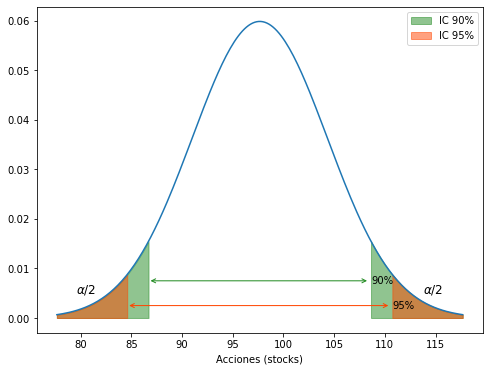

In [4]:
muestra = np.array([100, 109, 110, 80, 65, 125,120, 85, 85])
media_muestral = muestra.mean()  # X barra
sigma2 = 400  # varianza conocida
ssigma = np.sqrt(sigma2)  # desviación estándar
n = 9  # tamaño de la muestra
se = sigma / np.sqrt(n)  # estándar error 

# PDF
plt.figure(figsize=(8,6))
x = np.linspace(media_muestral-3*se, media_muestral+3*se, 200)
plt.plot(x, norm.pdf(x, media_muestral, se))

alpha = 0.1  # # IC 90%

# Python implementa el cálculo del intervalo de confianza
# loc: media muestral
# scale: error estándar s/sqrt(n)

# IC 90%
IC90 = norm.interval(1-alpha, loc=muestra.mean(), scale=se)  # intervalo IC90
print(r"IC("+str((1-alpha)*100)+"%):", IC90)

# sombreamos cola izquierda para IC90
x_left = np.linspace(media_muestral-3*se, IC90[0])
plt.fill_between(x_left, norm.pdf(x_left, media_muestral, se), color='forestgreen', alpha=0.5)
# sombreamos cola derecha para IC90
x_right = np.linspace(IC90[1], media_muestral+3*se)
plt.fill_between(x_right, norm.pdf(x_right, media_muestral, se), 
                 color='forestgreen', alpha=0.5, label="IC 90%")
plt.annotate("90%", xy=(IC90[0], 0.0075), xytext=(IC90[1], 0.0075), 
             va="center", # alineado vertical
             arrowprops=dict(arrowstyle="<->", color="forestgreen"))

# IC 95%
alpha = 0.05  # # IC 95%
IC95 = norm.interval(1-alpha, loc=muestra.mean(), scale=se)  # intervalo IC95
print(r"IC("+str((1-alpha)*100)+"%):", IC95)

# sombreamos cola izquierda para IC95
x_left = np.linspace(media_muestral-3*se, IC95[0])
plt.fill_between(x_left, norm.pdf(x_left, media_muestral, se), color='orangered', alpha=0.5)
# sombreamos cola derecha para IC95
x_right = np.linspace(IC95[1], media_muestral+3*se)
plt.fill_between(x_right, norm.pdf(x_right, media_muestral, se), 
                 color='orangered', alpha=0.5, label="IC 95%")
plt.annotate("95%", xy=(IC95[0], 0.0025), xytext=(IC95[1], 0.0025), 
             va="center", # alineado vertical
             arrowprops=dict(arrowstyle="<->", color ='orangered'))
plt.text(IC95[0]-5, 0.005, r"$\alpha/2$", fontsize=12)
plt.text(IC95[1]+3, 0.005, r"$\alpha/2$", fontsize=12)
plt.xlabel("Acciones (stocks)")
legend=plt.legend()

- De la misma manera, que calculamos un nivel de confianza del 95%, hemos calculado el del 90%. 
- Solo necesitamos cambiar el valor $z$ para el nivel de confianza indicado. 
- Note que el rango de un intervalo de confianza es mayor para un nivel de confianza más alto, tal como se muestra en la figura arriba.
  - Cuanto mayor sea el nivel de confianza (CL), menor será la precisión (más ancho el intervalo).
- Note que cada una de las colas tienen un area de $\alpha/2$.
  - El area que corresponde al intervalo de confianza es de $1 - \alpha$.
- Cuanto mayor sea el tamaño de la muestra, más preciso será el intervalo de confianza.
  - Compruébelo a partir de la formula, ¿qué pasa cuando $n$ crece?

<a id="tint"></a>
### Intervalo de Confianza para la media cuando se muestrea una distribución normal con varianza desconocida

[Volver al índice](#toc)

- **Supuestos:**

  1. Variable aleatoria (población): $X \sim N(\mu, \sigma^2)$.
  2. Parámetros poblacionales: $\mu$, $\sigma^2$ desconocidas. 
  3. Muestra aleatoria: $\bar{X}, n, s$, calculables a partir de la muestra aleatoria.
  
- **Estadístico:**
  1. Estimador del parámetro $\mu$:
  $$
  \bar{X} \sim N(\mu, \frac{\sigma^2}{n}).
  $$
  2. Construcción del estadístico:
  $$
  \frac{\bar{X} - \mu_X}{s / \sqrt n} \sim t_{(n-1)}.
  $$
  
- **Construcción del intervalo de confianza para el parámetro $\mu$:**

$$
P \left(t_{(\alpha/2,n-1)} \leq \frac{\bar{X} - \mu_X}{s / \sqrt n} \leq t_{(1-\alpha/2, n-1)} \right) = 1 - \alpha
$$

- El valor de $\alpha$ es un valor definido por el investigador que quiere inferir información acerca del parámetro poblacional $\mu_X$ a partir de una muestra. 
  - El valor de $\alpha$ se refiere a la probabilidad de que el valor verdadero del parámetro de la población se encuentre fuera del intervalo de confianza. 
  - El valor de $\alpha$ generalmente se expresa como una proporción. 
  - Por lo tanto, si el nivel de confianza ($1-\alpha$) del intervalo es del 95%, entonces $\alpha$ 
  sería igual a 1 - 0.95 = 0.05.
  
- Vamos a reescribir la desigualdad de tal forma que construimos el intervalo para el parámetro poblacional $\mu$:

$$
P \left(t_{(\alpha/2, n-1)} \leq \frac{\bar{X} - \mu_X}{s / \sqrt n} \leq t_{(1-\alpha/2,n-1)} \right) = 1 - \alpha
$$

- Multiplicamos por $\sigma_X / \sqrt n$
$$
P \left(t_{(\alpha/2,n-1)}\cdot s / \sqrt n \leq \bar{X} - \mu_X \leq t_{(1-\alpha/2,n-1)} \cdot s / \sqrt n \right) = 1 - \alpha
$$

- Restamos $\bar{X}$:
$$
P \left(-\bar{X} + t_{(\alpha/2,n-1)}\cdot s / \sqrt n \leq - \mu_X \leq -\bar{X} + t_{(1-\alpha/2,n-1)} \cdot s / \sqrt n \right) = 1 - \alpha
$$

- Multiplicamos por -1:
$$
P \left(\bar{X} - t_{(\alpha/2,n-1)}\cdot s / \sqrt n \geq \mu_X \geq \bar{X} - t_{(1-\alpha/2,n-1)} \cdot s / \sqrt n \right) = 1 - \alpha
$$

- Invertimos el sentido de la desigualdad:
$$
P \left(\bar{X} - t_{(1-\alpha/2,n-1)} \cdot s / \sqrt n \leq \mu_X \leq \bar{X} - t_{(\alpha/2,n-1)} \cdot s / \sqrt n \right) = 1 - \alpha
$$
  - El valor $t_{(1-\alpha/2,n-1)}$ es positivo y restaría a $\bar{X}$ para obtener el límite inferior. 
  - Note que el valor $t_{(\alpha/2,n-1)}$ es negativo, multiplicado por menos se vuelve positivo y sumaría al valor de $\bar{X}$ para el límite superior, como esperaríamos para cumplir con la desigualdad. 
  
- Teniendo en cuenta la simetría de las colas y que la distribución $t_{(n-1)}$ es tambíen una función par, podemos simplificar nuestro intervalo de confianza, de la siguiente forma:

$$IC_{(1-a)100\%} = \left[ \bar{X} \pm t_{(1-\alpha/2,n-1)} \cdot \frac{s}{\sqrt n} \right]$$

### Ejemplo

- Se ha recopilado la muestra aleatoria de los activos de 1000 clientes de un banco. Según el comportamiento de los datos, esta variable se comporta como un v.a. $N(\mu, \sigma^2)$. 
  - Con base en la muestra, se calculó que $\bar{X} = 517 (\$M)$,  y $s = 300 (\$M)$.
  
- Hallar el IC para $\mu$, de 90% y 95% de confiabilidad.

In [5]:
from scipy.stats import t  # importamos la distribución t

media_muestral = 517
s = 300  # desviación estándar
n = 1000  # tamaño de muestra, 1000 clientes
df = n - 1  # grados de libertad de la distribución t
se = s / np.sqrt(n)  # error estándar

# IC 90%
alpha = 0.1
# usando la implementación en Python t.interval
IC90 = t.interval(1-alpha, df, loc=media_muestral, scale=se)
print(r"IC("+str((1-alpha)*100)+"%):", IC90)

# IC 95%
alpha = 0.05
IC95 = t.interval(1-alpha, df, loc=media_muestral, scale=se)
print(r"IC("+str((1-alpha)*100)+"%):", IC95)

IC(90.0%): (501.3810646405426, 532.6189353594574)
IC(95.0%): (498.38359430750654, 535.6164056924935)


- La interpretación del intervalo es que tenemos un 90% de confianza en que el valor promedio de los activos de un cliente del banco está entre 501.38, 532.62 ($M).

- La interpretación del intervalo es que tenemos un 95% de confianza en que el valor promedio de los activos de un cliente del banco está entre 498.38, 535.62 ($M).

- Cuanto mayor sea el nivel de confianza (CL), menor será la precisión (más ancho el intervalo).

### Otro ejemplo

- Calcularemos un intervalo de confianza del 88 por ciento para la media de una sola muestra. 
  - Usaremos los siguientes datos: 
  
```Python
muestra = np.array([3,7,11,0,7,0,4,5,6,2])
```

In [6]:
alpha = 0.12  # 1 - alpha = 0.88
muestra = np.array([3,7,11,0,7,0,4,5,6,2])
media_muestral = muestra.mean()  # media muestral
n = len(muestra)  # tamaño de la muestra
s = muestra.std(ddof=1)  # desviación estándar no sesgada
se = s / np.sqrt(n)  # error estándar
df = n - 1  # grados de libertad para t
t_alpha = t.ppf(1-alpha/2, df)  # función cuantil 

IC88p = t.interval(1-alpha, df, loc=media_muestral, scale=se)  # Implementación Python
IC88m = (media_muestral - t_alpha * se, media_muestral + t_alpha*se)  # cálculo 'a mano' usando la fórmula
print(r"IC("+str((1-alpha)*100)+"%):", IC88p)
print(r"IC("+str((1-alpha)*100)+"%):", IC88m)

IC(88.0%): (2.6315982587598374, 6.368401741240162)
IC(88.0%): (2.631598258759838, 6.368401741240162)


- Recuerde que un intervalo de confianza para la media basado en la distribución T es válido cuando:

  - Los datos provienen de una distribución normal.
  - Tenemos muchos datos. 
    - ¿Cuánto es muchos datos? Muchos libros de texto utilizan 30 observaciones de datos como regla general.

### Resumiendo para una media muestral 

- Tenemos que:

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/one_sample_mean.png)

[Volver al índice](#toc)

### Distribución t

- La distribución $t$ es simétrica y tiene forma de campana, como la distribución normal $Z$. 
  - Sin embargo, la distribución $t$ tiene colas más pesadas, lo que significa que es más propensa a producir valores que caen lejos de su media.
- Si tomamos una muestra de $n$ observaciones de una distribución normal, entonces la distribución $t$ con
$\nu=n-1$ grados de libertad se pueden definir como la distribución de la ubicación de la media de la muestra en relación con la media real, dividida por la desviación estándar de la muestra, después de multiplicar por el término de estandarización
${\sqrt {n}}$.
- La distribución $t$ tiende a la distribución $Z$ a medida que el tamaño de muestra aumenta. 

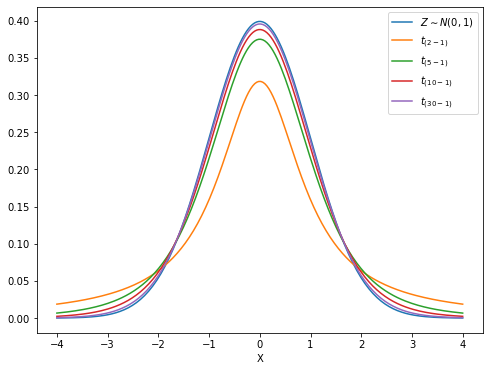

In [7]:
plt.figure(figsize=(8,6))
# Evaluamos para 4 desviaciones alrededor de la media
x = np.linspace(-4, 4, 200)  # 200 valores para suavizar

# Distribución normal estándar
plt.plot(x, norm.pdf(x), label=r"$Z\sim N(0,1)$")

# Vamos a graficar la distribución t(n-1) para diferentes tamaños de muestra n
n = [2, 5, 10, 30]  # sample sizes
for ni in n:
    # grados de libertad ni-1
    plt.plot(x, t.pdf(x, ni-1), label=r"$t_{("+ str(ni) + "-1)}$")
plt.xlabel('X')
legend = plt.legend()

### Simulación de intervalos de confianza

<br/>


<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/>

### Opcional: Practique Python
<br/><br/>

- Vamos a realizar una prueba t para la media poblacional $\mu$ a partir de una muestra de la v.a. $X \sim U(0,1)$. 
  - Tamaño de muestra 30.
  - Nivel de confianza $(1-\alpha)=0.95$.
  
- Vea una versión interactiva en: https://en-interactive.herokuapp.com/#/8/1

La media poblacional está en el intervalo 95.0 % de las veces.


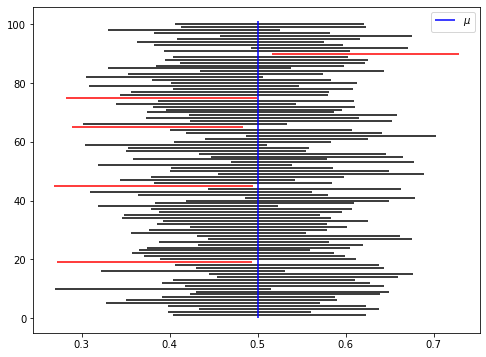

In [8]:
from scipy.stats import t

size = 100  # número de veces que calcularemos el IC
n = 30  # tamaño de muestra
alpha = 0.05
df = n - 1  # grados de libertad para t

# Estamos muestreando la distribución uniforme estándar
a, b = 0, 1
mu = (a+b)/2  # mu: media poblacional

# fijamos una semilla para tener reproducibilidad de los resultados
np.random.seed(7)

U = uniform.rvs(a, b-a, size=(size,n))  # uniform rvs
Um = np.mean(U, axis=1)  # media muestral 
Us = np.std(U, ddof=1, axis=1)  # varianza muestral
se = Us / np.sqrt(n)  # error estándar

ICL, ICU = t.interval(1-alpha, df, loc=Um, scale=se)  # Intervalo de confianza 

CI = np.vstack([ICL, ICU]).transpose()  # unimos ICL, ICU en 2 columnas
# comprobamos que mu está en el intervalo
# para esto debe cumplirse que limite inferior < mu y límite superior mayor que mu
# np.logical_and(CI[:,0] < mu, CI[:,1] > mu)
# ubicamos los índices donde se cumple la condición anterior 
# np.where(condicion)[]
cont = np.where(np.logical_and(CI[:,0] < mu, CI[:,1] > mu))[0]

plt.figure(figsize=(8,6))

# Graficamos cada intervalo como una línea horizontal
# Si el intervalo contiene la media poblacinal mu es negro
# rojo en caso contrario
for pos, limits in enumerate(CI):
    if pos in cont:  # está dentro del intervalo
        col = 'k'  # color negro
    else:  # está fuera del intervalo
        col = 'r'  # color rojo
    plt.hlines(pos+1, limits[0], limits[1], colors=col)  # línea horizontal

plt.vlines(mu, 0, size+1, colors='b', label=r"$\mu$")
plt.legend()

# Contemos cuantas veces el intervalo contiene la media poblacional
# Si el intervalo (lineal horizontal) contiene la media, este se intersecta con la línea vertical azul
print("La media poblacional está en el intervalo", np.shape(cont)[0]/size*100, "% de las veces.")

- En la figura arriba, podemos observar 100 repeticiones de la construcción de un intervalo de confianza para la media. 

- Note que arriba hemos realizado un t-test, a partir de una muestra que proviene de una distribución uniforme con un tamaño de muestra $n=30$, estamos violando el supuesto de normalidad de la población. 
  - En el recurso a continuación se discuten los supuestos para la prueba t y sus resultados dependiendo de la distribución de origen. 

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/t_test.png" alt="" width="600" />

  - Vea: https://www.youtube.com/watch?v=U1O4ZFKKD1k

<a id="tdint"></a>
### Intervalo de Confianza para la diferencia de medias cuando se muestrean dos distribuciones normales independientes con varianzas desconocidas pero iguales

[Volver al índice](#toc)

- **Supuestos:**
  1. Variables aleatorias: $X_1 \sim N(\mu_1, \sigma^2)$, $X_2 \sim N(\mu_2, \sigma^2)$.
  2. Parámetros poblacionales: $\mu_1,\ \mu_2,\ \sigma$ desconocidas.
  3. Muestras aleatorias: $\bar{X}_1,\ n_1,\ s_1,\ \bar{X}_2,\ n_2,\ s_2$ calculables a partir de la muestra aleatoria.

- **Estadístico:** 
  - Estimador del parámetro ($\mu_1-\mu_2$):
  $$\bar{X}_1 - \bar{X}_2 \sim N \left(\mu_1 - \mu_2, \frac{\sigma^2}{n_1}+\frac{\sigma^2}{n_2}\right)$$
  - Estadístico: $$\frac{\bar{X}_1 - \bar{X}_2 - (\mu_1 - \mu_2)}
{s_p \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} \sim t_{(n_1+n_2-2)}
     \text{, donde, }
     s_p = \sqrt{\frac{s_1^2(n_1-1) + s_2^2(n_2-1)}{n_1+n_2-2}}$$
     
  - $s_p$ se conoce como la desviación estándar agrupada (pooled standard deviation).
  
- **Construcción del intervalo de confianza para el parámetro ($\mu_1-\mu_2$):**
$$P \left( t_{(\alpha/2, n_1+n_2-2)} \leq \frac{\bar{X}_1 - \bar{X}_2 - (\mu_1 - \mu_2)}
{s_p \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} \leq t_{(1-\alpha/2, n_1+n_2-2)} \right) = 1-\alpha$$

$$IC_{(1-\alpha)100\%} = \left[\bar{X}_1 - \bar{X}_2 \pm t_{(1-\alpha/2, n_1+n_2-2)} \cdot s_p \sqrt{\frac{1}{n_1}+\frac{1}{n_2}} \right]$$

  - En este caso la demostración es un poco más compleja que las anteriores, puede ver en el [siguiente enlace](https://online.stat.psu.edu/stat415/lesson/3/3.1).
  
### Ejemplo

Se estudian los hábitos alimenticios de dos especies de arañas lanzadoras de redes. Las especies, Deinopis y Menneus, coexisten en el este de Australia. Se obtuvieron los siguientes datos sobre el tamaño, en milímetros, de las presas de muestras aleatorias de las dos especies:

Tamaño de muestras aleatorias de oración de la araña Deinopis en milímetros

```Python
deinopis = [12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3]
```

Tamaño de muestras de oración aleatorias de la araña Menneus en milímetros

```Python
menneus = [10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8]
```

¿Cuál es la diferencia, si la hay, en el tamaño medio de la presa (de las poblaciones) de las dos especies?

In [9]:
deinopis = np.array([12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3])

menneus = np.array([10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8])

n1, n2 = len(deinopis), len(menneus)  # tamaños de las muestras

m1, m2 = deinopis.mean(), menneus.mean()  # medias de las muestras

s1, s2 = deinopis.std(ddof=1), menneus.std(ddof=1)  # desviaciones de las muestras

# desviación agrupada
sp = np.sqrt((s1**2*(n1-1) + s2**2*(n2-1)) / (n1 + n2 - 2))
df = n1 + n2 - 2  # grados de libertad para t
alpha = 0.05
t_alpha = t.ppf(1-alpha/2, df)  # función cuantil 
se = sp * np.sqrt(1/n1 + 1/n2)  # error estándar
IC95 = (m1 - m2) - t_alpha * se, (m1 - m2) + t_alpha * se
print('t_alpha', np.round(t_alpha, 6), r"IC("+str((1-alpha)*100)+"%):", IC95)

t_alpha 2.100922 IC(95.0%): (-0.8520326742900641, 3.332032674290068)


- Podemos estar seguros en un 95% de que la diferencia media en el tamaño de la presa está entre -0.85 mm y 3.33 mm. 
  - Debido a que el intervalo contiene el valor 0, no podemos concluir que las medias de la población sean diferentes.
  
- Usando la implementación en Python tenemos que usar **CompareMeans** del módulo **statsmodels**:

In [10]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(DescrStatsW(deinopis), DescrStatsW(menneus))

IC95 = cm.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

print(r"IC("+str((1-alpha)*100)+"%):", IC95)

IC(95.0%): (-0.8520326742900659, 3.3320326742900663)


<a id="welch"></a>
### Intervalo t de Welch (Welch's t-Interval)

[Volver al índice](#toc)

Si queremos usar la el intervalo $t$ con la desviación estándar agrupada $s_p$ para el conjunto de dos muestras como una forma de crear una estimación del intervalo para
$\mu_1-\mu_2$, la diferencia en las medias de dos poblaciones independientes, entonces debemos estar seguros de que las varianzas de la población
$\sigma_1^2$ y $\sigma_2^2$ son iguales. Sin embargo, ¿qué hacemos si no podemos asumir las varianzas iguales? Es decir, ¿y si $\sigma_1^2 \neq \sigma_2^2$?
Si ese es el caso, usamos lo que normalmente se conoce como intervalo t de Welch.

- **Intervalo t de Welch para $\mu_1-\mu_2$:** 
Si los datos se distribuyen normalmente (o si, las distribuciones subyacentes no son demasiado sesgadas, y $n_1$ y $n_2$ son lo suficientemente grandes), y las varianzas de la población, no puede suponerse que sean iguales, $\sigma_1^2 \neq \sigma_2^2$

Entonces el intervalo de confianza de $(1-\alpha)\%$
para la diferencia en las medias de la población $\mu_1-\mu_2$ es: 
$$IC_{(1-\alpha)100\%} = 
\left[ \bar{X}_1 - \bar{X}_2 \pm 
t_{(1-\alpha/2, r)} \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}\right]$$
donde los grados de libertad $r$ se aproximan por:
$$r=\frac{\left( \frac{s^2_1}{n_1} + \frac{s^2_2}{n_2} \right)^2}
{\frac{(s^2_1/n_1)^2}{n_1 - 1} + \frac{s^2_2/n_2}{n_2 - 1}}.$$

Si es necesario, como suele ser el caso, tome la parte entera de $\lfloor r \rfloor$.

**Retomemos el ejemplo de las especies de araña Deinopis y Menneus.**

- Python no implementa el intervalo t de Welch.
  - Implementaremos una función simple para este intervalo.
  - Vea: [intervalos de confianza en Python]( https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers#ind_unequal)

In [11]:
deinopis = np.array([12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3])

menneus = np.array([10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8])

def welch_t_interval(muestra_1, muestra_2, alpha=0.05):
    n1, n2 = len(muestra_1), len(muestra_2)  # tamaños de las muestras
    m1, m2 = muestra_1.mean(), muestra_2.mean()  # medias de las muestras
    # desviaciones de las muestras
    s1, s2 = muestra_1.std(ddof=1), muestra_2.std(ddof=1)
    se = np.sqrt(s1**2 / n1 + s2**2 / n2)  # error estándar
    r = (s1**2 / n1 + s2**2/n2 )**2 / ( 
        (s1**2 / n1)**2/(n1-1) + (s2**2 / n2)**2/(n2-1) 
    )  # grados de libertad
    r = int(r)  # nos quedamos solo con la parte entera
    t_alpha = t.ppf(1-alpha/2, r)  # función cuantil 
    lower, upper = (m1 - m2) - t_alpha * se, (m1 - m2) + t_alpha * se
    return lower, upper

IC95 = welch_t_interval(deinopis, menneus)
print(r"IC("+str((1-alpha)*100)+"%):", IC95)

IC(95.0%): (-0.8709356118051668, 3.3509356118051707)


<a id="paired"></a>
### Intervalo t para datos pareados
[Volver al índice](#toc)

- En algunos estudios, hacemos dos observaciones sobre el mismo individuo. Por ejemplo, podríamos ver los puntajes previos y posteriores a una prueba de cada estudiante en un curso. 
- En otros estudios, podríamos hacer una observación sobre cada uno de dos individuos similares. Por ejemplo, algunos ensayos de medicamentos implican el emparejamiento de sujetos similares para que uno reciba el medicamento y el otro reciba un placebo.
  
- En ambos tipos de estudios, estamos trabajando con datos emparejados, y cada vez que trabajamos con datos emparejados, normalmente estamos interesados en la diferencia entre cada par, por ejemplo, la diferencia entre los datos de los individuos que recibieron la medicina y el placebo.

- Dada 
$X_1$ (etiquetada como No afectado) 
y $X_2$ (etiquetada como Afectado) y corresponden a nuestro datos pareados, $X_1$ observaciones pre, y $X_2$ observaciones post, (o placebo y medicina, según el ejemplo).

- Nos interesa encontrar un intervalo de confianza para la diferencia de medias:
$$\mu_1 - \mu_2$$

- Si los pares de mediciones fueran independientes, podríamos calcular un intervalo
t de Welch
o un intervalo t dependiendo de si podemos suponer o no que las varianzas de la población son iguales. 

- Pero, las medidas de $X_1$ y $X_2$ no son independientes, ya que se miden en el 'mismo par de individuo'. En este caso podemos expresar el problema para la diferencia en las medidas de los individuos afectados y no afectados:

$$D = X_1 - X_2.$$

- De esta manera removemos el efecto pareado, y podemos estimar un intervalo de confinaza para $\mu_D$:

$$\mu_D = \mu_1 - \mu_2.$$

- Entonces, volvemos a la situación en la que podemos usar el modelo de una muestra, y construir un intervalo t para estimar $\mu_D$. **Solo tenemos que dar el paso extra de calcular las diferencias.**

- **Supuestos:**
  1. Variable aleatoria: $D \sim N(\mu_D, \sigma^2)$.
  2. Parámetros poblacionales: $\mu_D,\ \sigma$ desconocidas.
  3. Muestras aleatoria: $\bar{d} = \frac{1}{n}\sum_{i=1}^n d_i = x_1^i - x_2^i$; y $s_d$ calculables a partir de la muestra aleatoria.
  
- **Estadístico:**
  1. Estimador del parámetro $\mu_D$: 
  $$\bar{d} = \frac{1}{n}\sum_{i=1}^n d_i = x_1^i - x_2^i.$$
  
- **Construcción del intervalo de confianza**

$$IC_{(1-a)100\%} = \left[ \bar{d} \pm t_{(1-\alpha/2,n-1)} \cdot \frac{s_d}{\sqrt n} \right]$$

<a id="pairedej"></a>
### Ejemplo

En un estudio, los investigadores informaron los resultados que controló las diferencias genéticas y socioeconómicas al examinar 15 pares de gemelos idénticos, donde uno de los gemelos era esquizofrénico y el otro no. Los investigadores utilizaron imágenes de resonancia magnética para medir los volúmenes (en centímetros cúbicos) de varias regiones y subregiones dentro del cerebro de los gemelos. Los siguientes datos provienen de una de las subregiones, el hipocampo izquierdo:

|      Par       |    1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |   10 |   11 |   12 |   13 |   14 |   15 |
|:------------|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| No_Afectado | 1.94 | 1.44 | 1.56 | 1.58 | 2.06 | 1.66 | 1.75 | 1.77 | 1.78 | 1.92 | 1.25 | 1.93 | 2.04 | 1.62 | 2.08 |
| Afectado    | 1.27 | 1.63 | 1.47 | 1.39 | 1.93 | 1.26 | 1.71 | 1.67 | 1.28 | 1.85 | 1.02 | 1.34 | 2.02 | 1.59 | 1.97 |

¿Cuál es la magnitud de la diferencia en los volúmenes del hipocampo izquierdo entre (todos) los individuos afectados y no afectados?

In [12]:
# index_col=0, indica que los datos contienen una columna (la 0) de índice
# el índice es un valor único 
# ejemplo: la cédula o código único del participante en el estudio
datos_pareados = pd.read_csv("data/paired_data.csv", index_col=0)

# calculemos la diferencia d = x1 - x2, x1: No afectado, x2: Afectado
datos_pareados['d'] = datos_pareados['No_Afectado'] - datos_pareados['Afectado']

alpha = 0.05  
n = len(datos_pareados['d'])
df = n - 1  # grados de libertad: tamaño de muestra - 1
d_bar = datos_pareados['d'].mean()  # promedio de d
# desviación de d, recordemos que pandas usa por defecto ddof=1
s_d = datos_pareados['d'].std()  # s_d
se = s_d / np.sqrt(n) # error estándar
t_alpha = t.ppf(1-alpha/2, df)

IC95 = t.interval(1-alpha, df, loc=d_bar, scale=se)
print(r"IC("+str((1-alpha)*100)+"%):", IC95)

FileNotFoundError: [Errno 2] No such file or directory: 'data/paired_data.csv'

- Es decir, podemos estar seguros en un 95 % de que el tamaño medio de los individuos no afectados es entre 0.0667 y 0.3306 centímetros cúbicos más grande que el tamaño medio de los individuos afectados.

  - Ver: https://online.stat.psu.edu/stat415/lesson/3/3.3

<a id="varpop"></a>
### Intervalo de confianza para la varianza de una población

[Volver al índice](#toc)

- **Supuestos:**

  1. Variable aleatoria: $X \sim N(\mu, \sigma^2)$
  2. Parámetros poblacionales: $\mu,\ \sigma^2$ desconocidas.
  3. Muestra aleatoria: $\bar{X},\ n,\ s$ calculables a partir de la muestra aleatoria.
  
- **Estadístico:**

$$\frac{s^2}{\sigma^2}(n-1) \sim \chi^2_{(n-1)}$$

- **Construcción del Intervalo de confianza para el parámetro $\sigma^2$:**

$$P\left( \chi^2_{(\alpha/2, n-1)} \leq 
\frac{s^2}{\sigma^2}(n-1) \leq \chi^2_{(1-\alpha/2, n-1)} \right) = 1-\alpha$$

  - Multiplicamos la desigualdad por $\frac{1}{s^2 (n-1)}$:
  
$$P\left( \frac{1}{s^2(n-1)} \chi^2_{(\alpha/2, n-1)} \leq 
\frac{1}{\sigma^2} \leq \frac{1}{s^2 (n-1)} 
\chi^2_{(1-\alpha/2, n-1)} \right) = 1-\alpha$$

  - Invertimos las fracciones de la desigualdad, note que el oreden de la desigualdad ha cambiado:
  
$$P\left( \frac{s^2(n-1)}{\chi^2_{(\alpha/2, n-1)}} \geq 
\sigma^2 \geq \frac{s^2 (n-1)}{\chi^2_{(1-\alpha/2, n-1)}} \right) = 1-\alpha$$

  - Finalmente reordenamos los términos de la desigualdad:
  
$$P\left( \frac{s^2 (n-1)}{\chi^2_{(1-\alpha/2, n-1)}} \leq 
\sigma^2 \leq \frac{s^2(n-1)}{\chi^2_{(\alpha/2, n-1)}} \right) = 1-\alpha$$

- Podemos escribir el intervalo de confianza como:

$$IC_{(1-\alpha)100\%} = \left[ \frac{s^2 (n-1)}{\chi^2_{(1-\alpha/2, n-1)}}, 
\frac{s^2(n-1)}{\chi^2_{(\alpha/2, n-1)}} \right]$$

- Note que usamos los valores ($\chi^2_{(1-\alpha/2, n-1)}, \chi^2_{(\alpha/2, n-1)}$) dado que la distribución $\chi^2$ es no simétrica.

### Ejemplo:

Un fabricante de dulces produce, empaca y vende paquetes de dulces destinados a pesar 52 gramos. Al gerente de control de calidad que trabaja para la empresa le preocupa que la variación en los pesos reales de los paquetes de 52 gramos fuera mayor de lo aceptable. Es decir, le preocupaba que algunos paquetes pesaran significativamente menos de 52 gramos y otros pesaran significativamente más de 52 gramos. En un intento de estimar $\sigma$, la desviación estándar de los pesos de todos los paquetes de 52 gramos que fabrica la empresa, tomó una muestra aleatoria de n = 10 paquetes de la línea de producción. La muestra aleatoria arrojó una varianza muestral de 4.2 gramos. Use la muestra aleatoria para derivar un intervalo de confianza del 95% para $\sigma$.

In [ ]:
from scipy.stats import chi2
s2 = 4.2  # varianza de la muestra
n = 10 # tamaño de la muestra
df = n - 1  # grados de libertad para chi2
alpha = 0.05
se = s2 * (n-1)  # error estándar

IC95 = se / chi2.ppf(1-alpha/2, df), se / chi2.ppf(alpha/2, df)
print(r"IC("+str((1-alpha)*100)+"%):", IC95)

IC(95.0%): (1.9870925409024447, 13.997980661780439)


Podemos estar 95% seguros de que la varianza $\sigma^2$ de los pesos de todos los paquetes de dulces que salen de la línea de fábrica está entre 1.99 y 14.0 gramos cuadrados. 

- Tomando la raíz cuadrada de los límites de confianza, obtenemos el intervalo de confianza del 95% para la desviación estándar de la población $\sigma$. 

In [ ]:
print(r"IC("+str((1-alpha)*100)+"%):", np.sqrt(IC95[0]), np.sqrt(IC95[1]))

IC(95.0%): 1.4096426997301283 3.741387531622518


Podemos estar 95% seguros de que la desviación estándar $\sigma$ de los pesos de todos los paquetes de dulces que salen de la línea de fábrica está entre 1.41 y 3.74 gramos.

  - El intervalo de la desviación no contiene al cero. Por lo tanto la línea de producción está empacando más dulces de lo indicado en el paquete (52 gramos) generando pérdidas para la empresa.

<a id="varcoc"></a>
### Intervalo de Confianza con respecto al cociente de varianzas de dos distribuciones normales independientes

[Volver al índice](#toc)

- **Supuestos:**
  1. Variables aleatorias $X_1 \sim N(\mu_1, \sigma_1^2),\ X_2 \sim N(\mu_2, \sigma_2^2)$
  2. Parámetros poblacionales $\mu_1,\ \sigma_1^2,\ \mu_2,\ \sigma_2^2$ desconocidas.
  3. Muestra aleatoria: $\bar{X}_1,\ n_1,\ s_1,\ \bar{X}_2,\ n_2,\ s_2$ calculables a partir de la muestra aleatoria. 
  
- **Estadístico**:
$$\frac{s_2^2 \sigma_1^2}{s_1^2 \sigma_2^2} \sim F_{(n_2-1,n_1-1)}$$

  - Al inicio de este notebook hemos demostrado la distribución de los estadísticos más importantes, incluido el descrito arriba. 
    - Ver: https://online.stat.psu.edu/stat415/lesson/4/4.3
    
- **Construcción del intervalo de confianza para el parámetro 
$\frac{\sigma_1^2}{\sigma_2^2}$**

$$P \left( F_{(a/2,n_2-1,n_1-1)} \leq 
\frac{s_2^2 \sigma_1^2}{s_1^2 \sigma_2^2}  
\leq F_{(1-a/2,n_2-1,n_1-1)} \right) 
= 1-\alpha$$

- Multiplicamos por $\frac{s_1^2}{s_2^2}$

$$P \left(\frac{s_1^2}{s_2^2} F_{(a/2,n_2-1,n_1-1)} \leq 
\frac{\sigma_1^2}{\sigma_2^2}  
\leq \frac{s_1^2}{s_2^2} F_{(1-a/2,n_2-1,n_1-1)} \right) 
= 1-\alpha$$

- Podemos escribir el intervalo de confianza como:

$$IC_{(1-\alpha)100\%} = \left[ \frac{s_1^2}{s_2^2} F_{(a/2,n_2-1,n_1-1)}, 
\frac{s_1^2}{s_2^2} F_{(1-a/2,n_2-1,n_1-1)}
\right]$$

### Ejemplo

**Retomemos el ejemplo de las especies de araña Deinopis y Menneus.**

- Implementaremos una función simple para el intervalo de confianza del parámetro $\frac{\sigma_1^2}{\sigma_2^2}$.
  - Vea: [intervalos de confianza en Python]( https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers#ind_unequal)

In [ ]:
from scipy.stats import f

deinopis = np.array([12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3])

menneus = np.array([10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8])

n1 = len(deinopis)
n2 = len(menneus)
v1 = deinopis.var(ddof=1)  # varianza s1^2 
v2 = menneus.var(ddof=1)  # varianza s2^2 
alpha = 0.05
df1 = n1-1  # grados de libertad n1, F
df2 = n2-1  # grados de libertad n2, F
se = v1/v2  # error estándar

IC95 = f.ppf(alpha/2, df1, df2)*se, f.ppf(1-alpha/2, df1, df2)*se
print(r"IC("+str((1-alpha)*100)+"%):", IC95)

IC(95.0%): (0.4362556597895196, 7.071106122331457)


- Podemos estar 95% seguros de que la relación de las dos varianzas de población está entre 0.434 y 7.071. 
  - Debido a que el intervalo contiene el valor 1, no podemos concluir que las varianzas de la población difieren). 
  
- Los intervalos de confianza para las varianzas generalmente han perdido el favor de los estadísticos, porque no son muy precisos cuando los datos no se distribuyen normalmente. 
  - En ese caso, decimos que son "sensibles" al supuesto de normalidad, o que los intervalos "no son robustos".

<a id="prop"></a>
### Intervalo de Confianza para la proporción (una sola muestra) para muestras grandes

[Volver al índice](#toc)

- **Supuestos:**
  1. Variable aleatoria: $X \sim Bernoulli(p)$. $E[X]=p$, $Var[X]=p (1-p)$.
- **Estadístico:**
  1. Estimador del parámetro $p$: $\hat{p}$. 
  $$\hat{p} = \frac{1}{n}\sum_{i=1}^n x_i$$
  2. Estadístico: $$\frac{\hat{p} - p}{\sqrt{\frac{p(1-p)}{n}}} \sim Z$$
- Muestra aleatoria: $n$ y $\hat{p}$ calculables a partir de la muestra aleatoria.
- **Construcción del intervalo de confianza para el parámetro $p$:**
  - Vea: https://online.stat.psu.edu/stat415/lesson/5/5.1

$$P \left( z_{\alpha/2} \leq 
\frac{\hat{p} - p}{\sqrt{\frac{p(1-p)}{n}}} \leq
z_{1-\alpha/2} 
\right) = 1 - \alpha$$

- Multipliquemos por $\sqrt{\frac{p(1-p)}{n}}$

$$P \left( z_{\alpha/2} \sqrt{\frac{p(1-p)}{n}} \leq 
\hat{p} - p \leq
z_{1-\alpha/2} \sqrt{\frac{p(1-p)}{n}}
\right) = 1 - \alpha$$

- Restemos $\hat{p}$. 

$$P \left( - \hat{p} + z_{\alpha/2} \sqrt{\frac{p(1-p)}{n}} \leq 
- p \leq
-\hat{p} + z_{1-\alpha/2} \sqrt{\frac{p(1-p)}{n}}
\right) = 1 - \alpha$$

- Multipliquemos por (-1):

$$P \left( \hat{p} - z_{\alpha/2} \sqrt{\frac{p(1-p)}{n}} \geq 
p \geq
\hat{p} - z_{1-\alpha/2} \sqrt{\frac{p(1-p)}{n}}
\right) = 1 - \alpha$$

- Cambiemos el sentido de la deisgualdad:

$$P \left( \hat{p} - z_{1-\alpha/2} \sqrt{\frac{p(1-p)}{n}} \leq 
p \leq
\hat{p} - z_{\alpha/2} \sqrt{\frac{p(1-p)}{n}}
\right) = 1 - \alpha$$

- Note que para estimar el intervalo de confianza para $p$, necesitamos saber la proporción poblacional, el parámetro poblacional $p$. 
  - Reemplazamos $p$ por $\hat{p}$ en el cálculo de los puntos extremos del intervalo de confianza:
  
  $$P \left( \hat{p} - z_{1-\alpha/2} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \leq p \leq \hat{p} - z_{\alpha/2} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \right) = 1 - \alpha$$

  - El valor $z_{(1-\alpha/2)}$ es positivo y restaría a $\hat{p}$ para obtener el límite inferior. 
  - Note que el valor $z_{(\alpha/2)}$ es negativo, multiplicado por menos se vuelve positivo y sumaría al valor de $\hat{p}$ para el límite superior, como esperaríamos para cumplir con la desigualdad. 
  
- Teniendo en cuenta la simetría de las colas y que la distribución $Z\sim N(0,1)$ es una función par, podemos simplificar nuestro intervalo de confianza, de la siguiente forma:

$$IC_{(1-\alpha)\%} = \left[ \hat{p} \pm z_{1-\alpha/2} 
\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \right]$$

### Ejemplo

En una muestra aleatoria de n = 500 familias en la ciudad de Quito, Ecuador, se encuentra que 340 están suscritas a Netflix. Calcule un intervalo de confianza del 95% para la proporción real de familias de Quito que están suscritas a Netlfix.

In [ ]:
hat_p = 340 / 500  # estimador de p
n = 500  # tamaño de muestra
alpha = 0.05
z_alpha = norm.ppf(1-alpha/2)
se = np.sqrt(hat_p*(1-hat_p)/n)  # error estándar
IC95 = hat_p - z_alpha*se, hat_p + z_alpha*se
print(r"IC("+str((1-alpha)*100)+"%):", IC95)

IC(95.0%): (0.639112313849203, 0.7208876861507971)


- Podemos estar seguros en un 95% de que entre el 63.91% y el 72.09% de las familias de Quito están suscritos a Netflix. 

In [ ]:
# Python implmenta este intervalo
from statsmodels.stats.proportion import proportion_confint
IC95 = proportion_confint(count=340, nobs=500, alpha=0.05, method='normal')
print(r"IC("+str((1-alpha)*100)+"%):", IC95)

IC(95.0%): (0.639112313849203, 0.7208876861507971)


<a id="propdiff"></a>
### Intervalo de Confianza para la diferencia de proporciones cuando se muestrean dos poblaciones independientes

[Volver al índice](#toc)

- **Supuestos:**
  1. Variables aleatorias: 
  $$X_1 \sim Bernoulli(p_1), \quad
  X_2 \sim Bernoulli(p_2)$$
  $$E[X_1]=p_1, Var[X_1]=p_1 (1-p_1),\quad E[X_2]=p_2, Var[X_2]=p_2 (1-p_2)$$
  
- **Estadístico:**

  1. Estimador el parámetro ($p_1+p_2$): $\hat{p_1}+\hat{p_2}$.
  2. Estadístico: 
  $$\frac{\hat{p_1}+\hat{p_2} - (p_1+p_2)}
  {\sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1}} + 
  \sqrt{\frac{\hat{p_2}(1-\hat{p_2})}{n_2}}
  } \sim N(0,1)$$
  
- **Construcción del Intervalo de confianza para el parámetro (p1 - p2):**

$$IC_{(1-\alpha)100\%} = \left[ \hat{p_1} - \hat{p_2} \pm
z_{1-\alpha/2} 
\sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1} + \frac{\hat{p_2}(1-\hat{p_2})}{n_2}} \right]$$
  - Vea: https://online.stat.psu.edu/stat415/lesson/5/5.2
  
### Ejemplo

¿Cuál es la prevalencia de la anemia en los países en desarrollo?

| | Mujeres africanas     | Mujeres de las Américas |
| ----------- | ----------- | ----------- |
| Tamaño de la muestra      | 2100       | 1900       |
| Número con anemia  | 849        | 323      |

Encuentre un intervalo de confianza del 95% para la diferencia en las proporciones de todas las mujeres africanas con anemia y todas las mujeres de las Américas con anemia.

In [ ]:
p1 = 849 / 2100  # proporción africana
p2 = 323 / 1900  # proporción americana
n1 = 2100
n2 = 1900
alpha = 0.05
z_alpha = norm.ppf(1-alpha/2)
se = np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
IC95 = (p1-p2) - z_alpha*se, (p1-p2) + z_alpha*se
print(r"IC("+str((1-alpha)*100)+"%):", IC95)

IC(95.0%): (0.2073443507014389, 0.2612270778699897)


Podemos estar seguros en un 95% de que hay entre un 20.7% y un 26.1% más de mujeres africanas con anemia que de mujeres de las Américas.

- Versiones recientes de **statsmodels** implementan este intervalo, vea la [documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.confint_proportions_2indep.html).

In [ ]:
from statsmodels.stats.proportion import confint_proportions_2indep

IC95 = confint_proportions_2indep(count1=849, nobs1=2100, 
                           count2=323, nobs2=1900, 
                           compare='diff', alpha=0.05, correction=False)
print(r"IC("+str((1-0.05)*100)+"%):", IC95)

IC(95.0%): (0.2070724389090843, 0.2609361799283984)


<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/>

### Opcional: Practique Python
<br/>

- Vea la implementación siguiente:
  - Confidence interval for the difference between two proportions in Python en  [stackoverflow](https://stackoverflow.com/questions/47570903/confidence-interval-for-the-difference-between-two-proportions-in-python)

In [ ]:
def two_proprotions_confint(success_a, size_a, success_b, size_b, significance = 0.05):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its confidence interval;
    resulting confidence interval matches R's prop.test function

    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group

    size_a, size_b : int
        Size, or number of observations in each group

    significance : float, default 0.05
        Often denoted as alpha. Governs the chance of a false positive.
        A significance level of 0.05 means that there is a 5% chance of
        a false positive. In other words, our confidence level is
        1 - 0.05 = 0.95

    Returns
    -------
    prop_diff : float
        Difference between the two proportion

    confint : 1d ndarray
        Confidence interval of the two proportion test
    """
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    var = prop_a * (1 - prop_a) / size_a + prop_b * (1 - prop_b) / size_b
    se = np.sqrt(var)

    # z critical value
    confidence = 1 - significance
    z = norm.ppf(confidence + significance / 2)

    # standard formula for the confidence interval
    # point-estimtate +- z * standard-error
    prop_diff = prop_a - prop_b
    confint = prop_diff + np.array([-1, 1]) * z * se
    return prop_diff, confint

dif_prop, IC95 = two_proprotions_confint(849, n1, 323, n2, significance = 0.05)
print(r"IC("+str((1-alpha)*100)+"%):", IC95)

IC(95.0%): [0.20734435 0.26122708]


<a id="fic"></a>
### Resumen de fórmulas

- Ver __[resumen de fórmulas](https://drive.google.com/open?id=13UyYrWb4MtYr2vJpSnvZWyETH1mW360W)__ para construir intevalos de confianza.

<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>

[Volver al índice](#toc)

### ANOVA

- Investigue el análisis de varianza (ANOVA) de un factor. Este es un método estadístico para examinar las diferencias para las medias entre grupos.
  - Sources:
    - https://online.stat.psu.edu/stat415/lesson/13
    - https://www.reneshbedre.com/blog/anova.html

### Estimación de máxima verosimilitud

- Con anterioridad hemos hecho referencia a estimación de máxima verosimilitud, investigue acerca de estimación de máxima verosimilitud.
  - Sources:
    - https://newonlinecourses.science.psu.edu/stat414/node/289/
    - https://newonlinecourses.science.psu.edu/stat414/node/290/
    
    
### Distribution fitting 
- [En Python](https://anaconda.org/marsgr6/distribution_fitting_python/notebook)
- [En R](https://anaconda.org/marsgr6/distribution_fitting_r/notebook)